# Exponential Solutions
## Do imports

In [1]:
%run -i 'imports.py'

In [2]:
%run -i 'definitions_and_defaults.py'

In the '.../intro_curve_fitting_python/exponential_data' directory you will find the following files:

In [3]:
os.listdir(basedir+'/exponential_data/')

['exponential2.csv', 'exponential3.csv', 'exponential1.csv']

It should not be too difficult to adapt your work from the linear fitting exercises to these data sets.<br><br>To get you started, I will define an appropriate fitting function:
$$f(x)=c+A_0e^{kx}$$
with $k<0$ assumed. 


Note that you will have to customize this function to fit data set 3. If you get stuck with that, check out the [notebook](./generate_datasets.ipynb) with which I created the data, or view it as a [webpage](./html/generate_datasets.html).

## Define a general exponential function:

In [4]:
def genexpfunc(x, a, k, c):
    return c+a*np.exp(k*x)

## exponential1.csv

In [5]:
# dataset exponential1.csv
fn = basedir+'/exponential_data/exponential1.csv'
x,y = csv2xy(fn)

## Scatter plot:

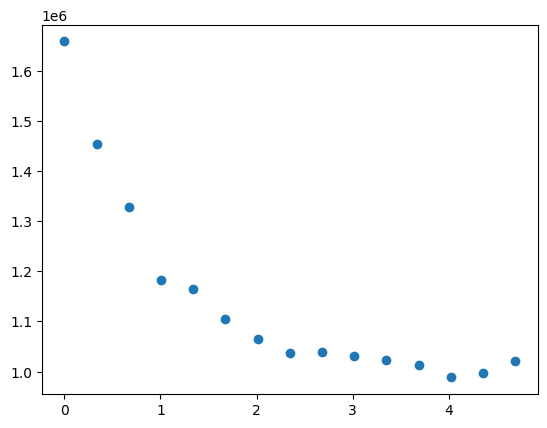

In [6]:
plt.scatter(x,y)
plt.show()

When fitting any model more complicated than a straight line, it is wise to specify an initial set of parameters to the fitting routine$^\dagger$ which are in the right range to describe the data. So, let's estimate the parameters $a$, $c$, and $k$.<br><br>This looks like an exponential decay curve that has 'gone to zero...' many half-lives have passed. So, let's estimate $c$ as the least y-value in the data set. Then, the first y-value in the data set, at $x=0$, will have the value $c+A_0e^0$, so estimate $A_0=y(0)-c$.<br><br>$\dagger$: Note that curve_fit sets all initial parameter values to 1 in the absence of specification to the contrary.

In [7]:
c=np.min(y)
a=y[:1][0]-c

## On estimating $k$:
No doubt you are familiar with the idea 'after 10 half-lives, a radioactive substance has, for all intents and purposes, decayed away.' In analogy with the concept of the half-life is the concept of the <i>lifetime.</i> After one lifetime, $\tau$, of the process has passed, $\frac{1}{e}$ of the original material remains. Therefore, if:
$$y(t)=A_0e^{kt}$$then:
$$y(\tau)=A_0e^{k\tau}$$and:
$$y(\tau)=\frac{A_0}{e}$$Setting these last two equations equal to each other and solving for $\tau$ provides:

$$\frac{A_0}{e}=A_0e^{k\tau}$$
$$\frac{1}{e}=e^{k\tau}$$
Taking logarithms and rearranging provides the very simple relationship:
$$-1=k\tau$$
$$\tau=-\frac{1}{k}$$
Therefore, if you can eyeball the number of lifetimes $n$ described by the extent of decay you see in your data, you can estimate $k$ as:

$$k=-\frac{n}{t_{max}}$$
in which $t_{max}$ is the largest value of the independent variable in the data. To get a feel for how much decay goes with an arbitrary number of lifetimes, here are decays for one, three, five, and seven lifetimes.

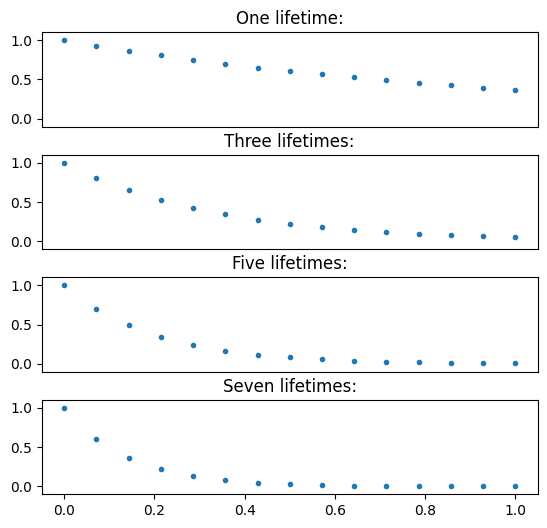

In [8]:
fig = plt.figure()

fig.set_figwidth=(8)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=4,
						hspace=0.3)  # height_ratios=[4, 1], width_ratios=[], hspace=??

t = np.linspace(0,1, 15)

n = [1, 3, 5, 7] # lifetimes

for i in range(4): 
    if i==0:
        why=np.exp(-n[i]*t)
    else:
        why = np.vstack((why,np.exp(-n[i]*t)))

ax0 = fig.add_subplot(spec[0])
ax0.scatter(t,why[0], marker='.')
ax0.set_title('One lifetime:')
ax0.set_ylim([-0.1, 1.1])
ax0.set_xticks([])

ax1 = fig.add_subplot(spec[1])
ax1.scatter(t,why[1], marker='.')
ax1.set_title('Three lifetimes:')
ax1.set_ylim([-0.1, 1.1])
ax1.set_xticks([])

ax2 = fig.add_subplot(spec[2])
ax2.scatter(t,why[2], marker='.')
ax2.set_title('Five lifetimes:')
ax2.set_ylim([-0.1, 1.1])
ax2.set_xticks([])

ax3 = fig.add_subplot(spec[3])
ax3.scatter(t,why[3], marker='.')
ax3.set_title('Seven lifetimes:')
ax3.set_ylim([-0.1, 1.1])

plt.show()

Based on the plots above, I'm eyeballing $n=3$ lifetimes for the data and estimating:
$$k=-3/1=-3$$

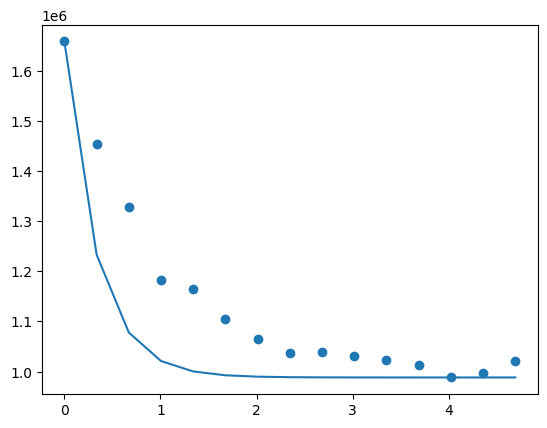

In [9]:
k=-3
# initial values of parameters
p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

That's a bit much; I'm going to make $k$ smaller, so $y$ decays a more slowly:

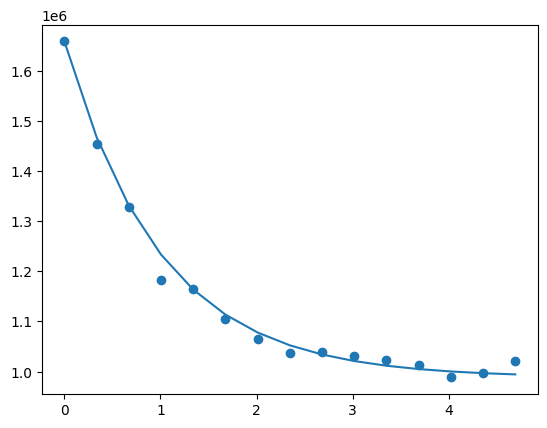

In [10]:
k=k/3
# initial values of parameters
p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

That ought to do it. 
## Curve fit:

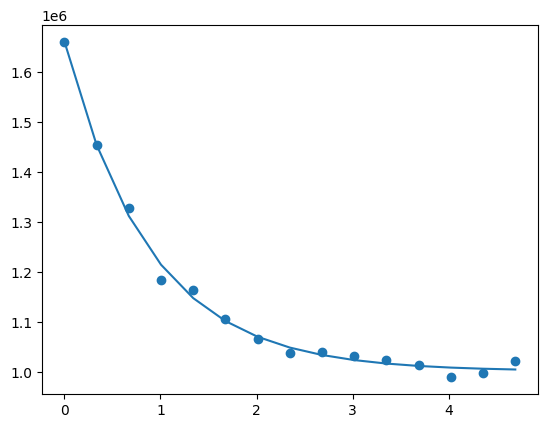

In [11]:
popt, pcov = curve_fit(genexpfunc, x, y, p0=p)

plt.scatter(x,y)
plt.plot(x,genexpfunc(x,*popt))
plt.show()

## Make a figure:

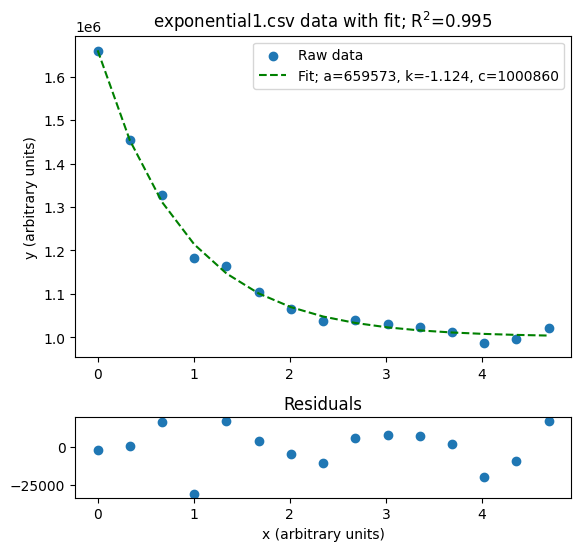

In [12]:
residuals = y-genexpfunc(x, *popt)

rsq = rsqrd(residuals, y)

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, genexpfunc(x, *popt), 'g--',
         label='Fit; a=%0.0f, k=%0.3f, c=%0.0f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential1.csv data with fit; R$^2$=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display 
plt.show()

## exponential2.csv
## Load and scatter plot:

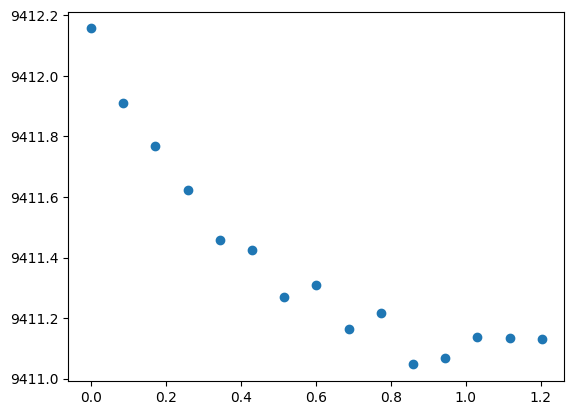

In [13]:
# dataset exponential2.csv
fn = basedir+'/exponential_data/exponential2.csv'
x,y = csv2xy(fn)

plt.scatter(x,y)
plt.show()

## Estimating initial parameters:
Estimiating initial parameters as previously:

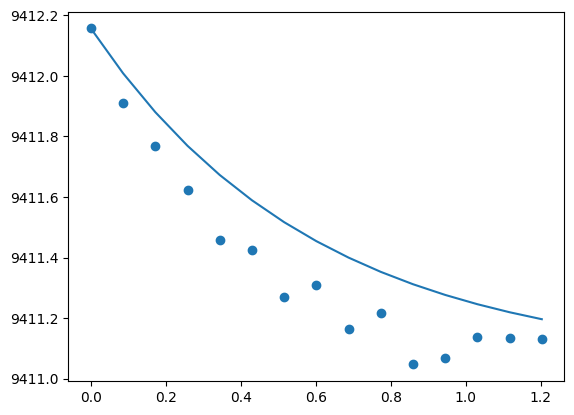

In [14]:
c=np.min(y)
a=y[:1][0]-c

# eyeballing n=2
k = -2/1.2
p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

Tweaking $k$ for quicker decay:

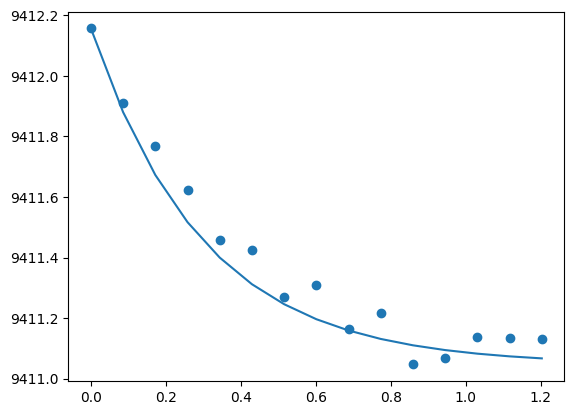

In [15]:
k=2*k

p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

That ought to do it. 
## Curve fit:

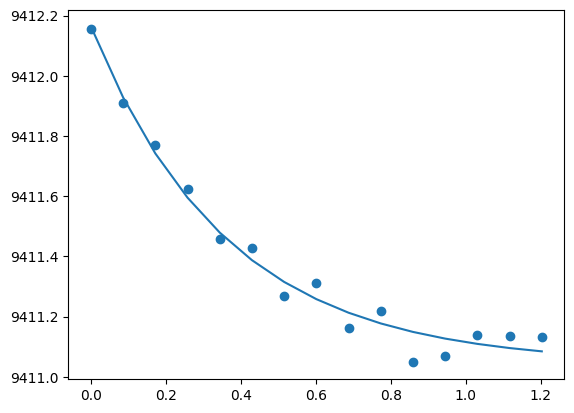

In [16]:
popt, pcov = curve_fit(genexpfunc, x, y, p0=p)

plt.scatter(x,y)
plt.plot(x,genexpfunc(x,*popt))
plt.show()

## Make a figure:

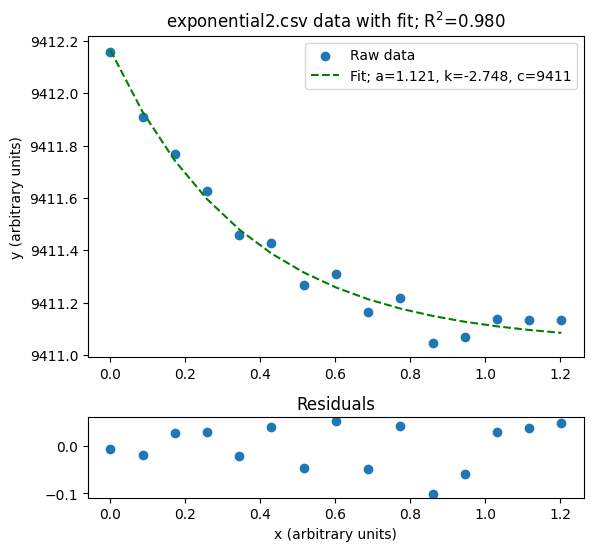

In [17]:
residuals = y-genexpfunc(x, *popt)

rsq = rsqrd(residuals, y)

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, genexpfunc(x, *popt), 'g--',
         label='Fit; a=%0.3f, k=%0.3f, c=%0.0f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential2.csv data with fit; R$^2$=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display
plt.show()

## exponential3.csv
## Read and scatter plot:

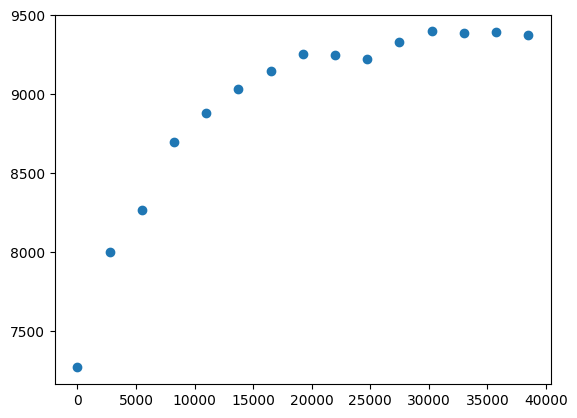

In [18]:
# dataset exponential3.csv
fn = basedir+'/exponential_data/exponential3.csv'

x,y = csv2xy(fn)
plt.scatter(x,y)
plt.show()

This is a decaying exponential of the form:
$$f(x)=c+A(1-e^{kx})$$
assuming $k<0$. 
## Encode an inverted exponential decay function:

In [19]:
def geninvertedexpfunc(x, a, k, c):
    return c+a*(1-np.exp(k*x))

## Estimate initial parameters:
By eye, $c=7300$, $a=9500-7300=1800$, say four lifetimes, so $k=-\frac{4}{40000}$:

[]

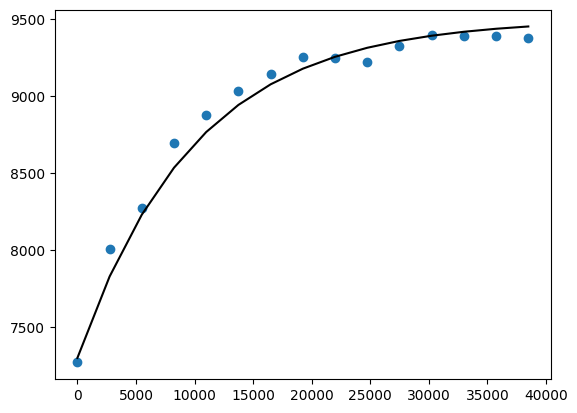

In [20]:
c=7300
a=9500-c
k=-4/40000
p=np.array([a,k,c])

plt.plot(x, geninvertedexpfunc(x, *p), 'k')
plt.scatter(x,y)
plt.plot()

Looks good. 
## Curve fit:

In [21]:
popt, pcov = curve_fit(geninvertedexpfunc, x, y, p0=p)
popt

array([ 2.10089516e+03, -1.27365782e-04,  7.29848222e+03])

## Make a figure:

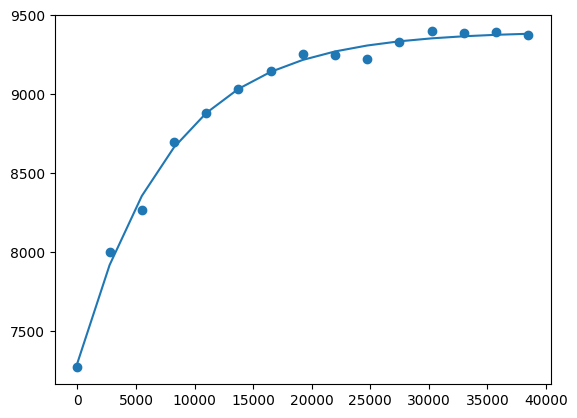

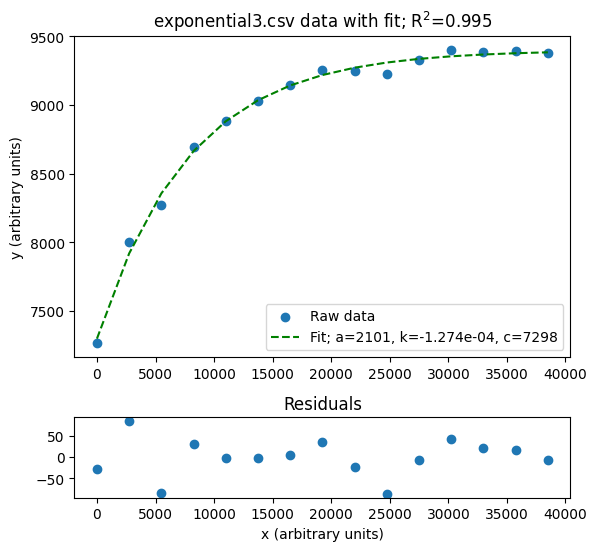

In [22]:
plt.scatter(x,y)
plt.plot(x,geninvertedexpfunc(x,*popt))
plt.show()

residuals = y-geninvertedexpfunc(x, *popt)

rsq = rsqrd(residuals, y)

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, geninvertedexpfunc(x, *popt), 'g--',
         label='Fit; a=%0.0f, k=%.3e, c=%0.0f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential3.csv data with fit; R$^2$=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display and save the figure
plt.show()